### Model Training

#### importing data and required packages

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Importing the dataset

In [29]:
df = pd.read_csv("data\StudentsPerformance.csv")

In [30]:
# first 5 rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables 

In [31]:
x = df.drop(columns=['math score'],axis = 1)

In [32]:
x.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [33]:
print("Catogorical variables")

print("gender: ",df['gender'].unique())
print("race/ethnicity: ",df['race/ethnicity'].unique())
print("parental level of education: ",df['parental level of education'].unique())
print("lunch: ",df['lunch'].unique())
print("test preparation course: ",df['test preparation course'].unique())

Catogorical variables
gender:  ['female' 'male']
race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:  ['standard' 'free/reduced']
test preparation course:  ['none' 'completed']


In [34]:
y = df['math score']

In [35]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Transformation

In [36]:
num_features = x.select_dtypes(exclude = 'object').columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)

    ]
)

In [37]:
x = preprocessor.fit_transform(x)

In [38]:
x.shape


(1000, 19)

#### Splitting the dataset into traing and testing

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [40]:
# creating a function for evaluting every model
def evaluate_model(true,predicted):
    MAE = mean_absolute_error(true,predicted)
    MSE = mean_squared_error(true,predicted)
    RMSE = np.sqrt(MSE)
    R2_score = r2_score(true,predicted)
    return MAE,RMSE,R2_score


Linear_Regression
model performance for training
mean absolute error:4.2715
Root mean squared error:5.3293
R2 Score: 0.8740
-----------------------------------
model performance for testing
mean absolute error:4.2222
Root mean squared error:5.4252
r2 score:0.8790




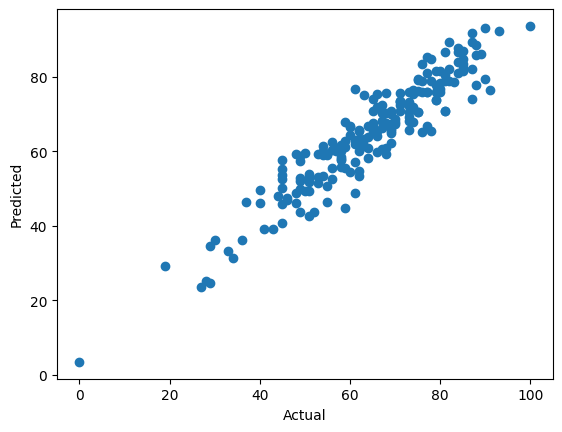

Lasso
model performance for training
mean absolute error:5.2063
Root mean squared error:6.5938
R2 Score: 0.8071
-----------------------------------
model performance for testing
mean absolute error:5.1579
Root mean squared error:6.5197
r2 score:0.8253




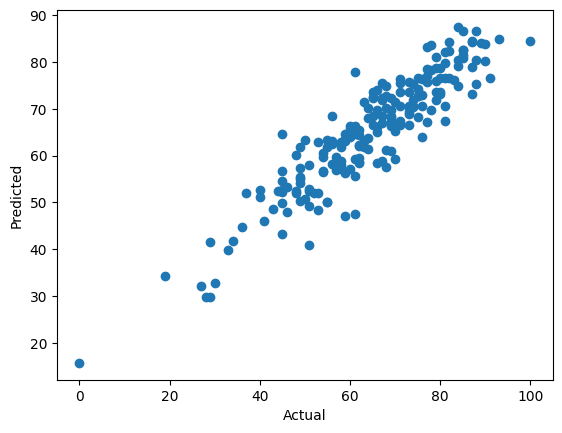

Ridge
model performance for training
mean absolute error:4.2650
Root mean squared error:5.3233
R2 Score: 0.8743
-----------------------------------
model performance for testing
mean absolute error:4.2111
Root mean squared error:5.3904
r2 score:0.8806




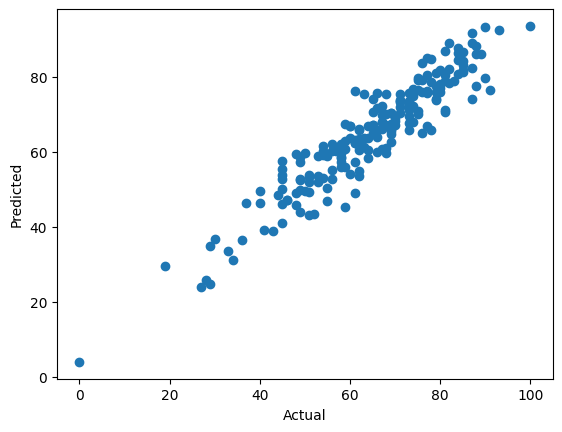

K-Neighbors_Regressor
model performance for training
mean absolute error:4.5168
Root mean squared error:5.7079
R2 Score: 0.8555
-----------------------------------
model performance for testing
mean absolute error:5.6210
Root mean squared error:7.2530
r2 score:0.7838




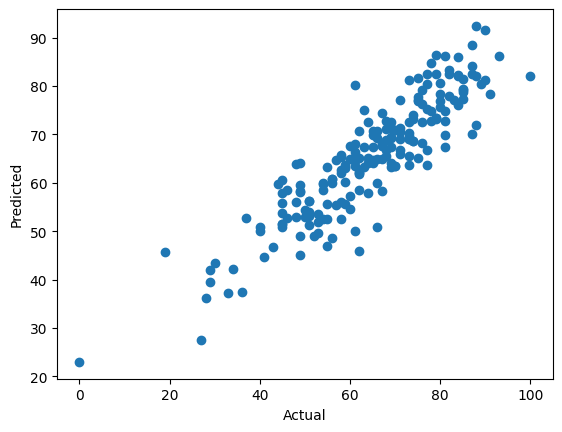

Decision_TreeRegressor
model performance for training
mean absolute error:0.0187
Root mean squared error:0.2795
R2 Score: 0.9997
-----------------------------------
model performance for testing
mean absolute error:6.3600
Root mean squared error:7.9517
r2 score:0.7402




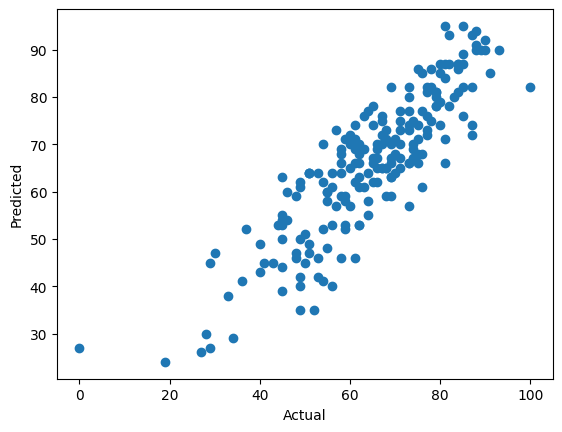

Random_Forest_Regressor
model performance for training
mean absolute error:1.8437
Root mean squared error:2.3117
R2 Score: 0.9763
-----------------------------------
model performance for testing
mean absolute error:4.7158
Root mean squared error:6.0564
r2 score:0.8493




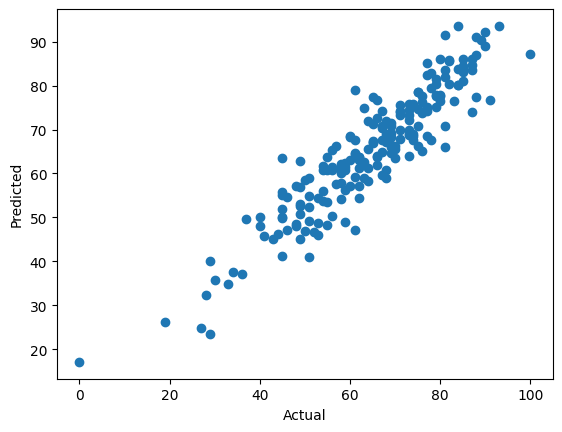

XGB_Regressor
model performance for training
mean absolute error:0.6875
Root mean squared error:1.0073
R2 Score: 0.9955
-----------------------------------
model performance for testing
mean absolute error:5.0577
Root mean squared error:6.4733
r2 score:0.8278




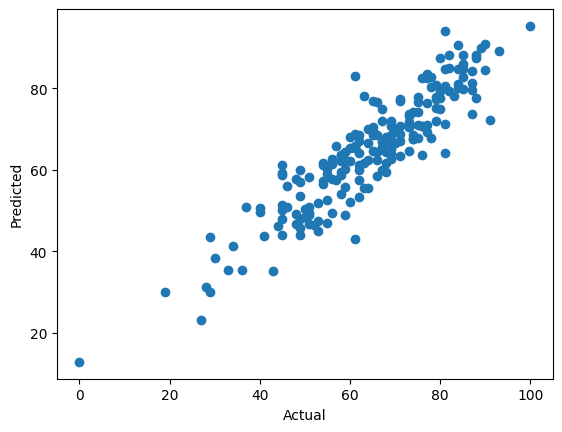

CatBoost_Regressor
model performance for training
mean absolute error:2.4054
Root mean squared error:3.0427
R2 Score: 0.9589
-----------------------------------
model performance for testing
mean absolute error:4.6125
Root mean squared error:6.0086
r2 score:0.8516




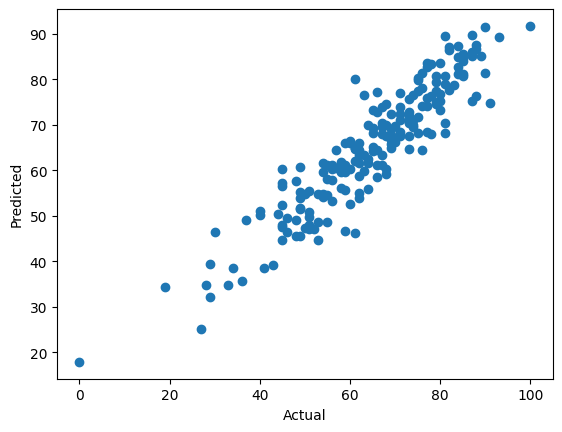

AdaBoost_Regressor
model performance for training
mean absolute error:4.7512
Root mean squared error:5.8416
R2 Score: 0.8486
-----------------------------------
model performance for testing
mean absolute error:4.7649
Root mean squared error:6.1071
r2 score:0.8467




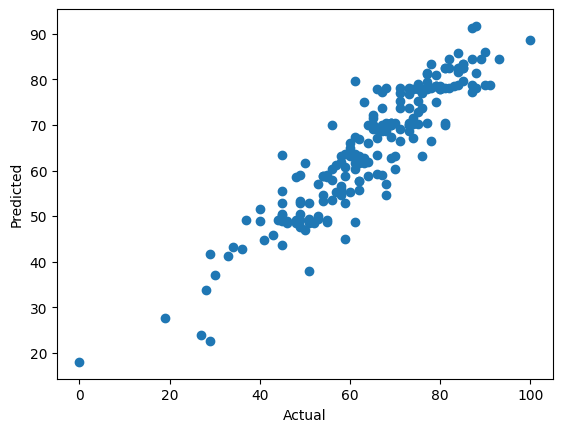

In [48]:
models  = {
    "Linear_Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors_Regressor": KNeighborsRegressor(),
    "Decision_TreeRegressor": DecisionTreeRegressor(),
    "Random_Forest_Regressor": RandomForestRegressor(),
    "XGB_Regressor": XGBRegressor(),
    "CatBoost_Regressor": CatBoostRegressor(verbose= False),
    "AdaBoost_Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)


    # make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    # evaluate train and test dataset
    m_train_mae, m_train_rmse, m_train_r2 = evaluate_model(y_train,y_train_pred)
    m_test_mae,m_test_rmse,m_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training")
    print("mean absolute error:{:.4f}".format(m_train_mae))
    print("Root mean squared error:{:.4f}".format(m_train_rmse))
    print("R2 Score: {:.4f}".format(m_train_r2))
    print("-"*35)

    print("model performance for testing")
    print("mean absolute error:{:.4f}".format(m_test_mae))
    print("Root mean squared error:{:.4f}".format(m_test_rmse))
    print("r2 score:{:.4f}".format(m_test_r2))
    r2_list.append(m_test_r2)

    print("="*35)
    print('\n')


    plt.scatter(y_test,y_test_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


In [44]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ["Model Name","R2_score"])

,Model Name,R2_score
0,Linear_Regression,0.879046
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors_Regressor,0.783813
4,Decision_TreeRegressor,0.741245
5,Random_Forest_Regressor,0.852612
6,XGB_Regressor,0.827797
7,CatBoost_Regressor,0.851632
8,AdaBoost_Regressor,0.850075


#### Difference between Actual and Predicted Values

In [49]:
pred_df = pd.DataFrame(list(zip(y_test,y_test_pred,list(y_test-y_test_pred))),columns=["Actual Value","Predicted value","Difference"])
pred_df

,Actual Value,Predicted value,Difference
0,91,78.709184,12.290816
1,53,56.976378,-3.976378
2,80,78.030303,1.969697
3,74,77.924242,-3.924242
4,84,82.421875,1.578125
...,...,...,...
195,52,48.531915,3.468085
196,62,55.632302,6.367698
197,74,67.090909,6.909091
198,65,69.938596,-4.938596
